In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import synapseclient as syn

In [ ]:
sns.set_style('white')
sns.set_context("poster", font_scale = 1.5)
sc = syn.login()

In [ ]:
data = pd.read_csv(sc.get('syn61831559').path,delimiter='\t')
data = data[[i for i in data.columns if 'GILTplusVEN' not in i and 'GILTVEN' not in i]]
#data = pd.read_csv(ds#'GILT-VEN-DEC-RNASEQ/RNA230425ET_logCPM.txt', delimiter='\t')
# rna_de = data['DE Results'].copy()

In [ ]:
data.columns

In [ ]:
columns = ['ER11GILTplusDECplusFLT3',
       'ER12GILTplusDECplusFLT3', #'ER33GILTplusVENplusFGF2',
#       'ER34GILTplusVENplusFLT3', 'ER35GILTplusVENplusFLT3',
#      'ER36GILTplusVENplusFLT3', 'ER38GILTplusVENDEC',
#      'ER40GILTVENplusVENplusDECplusFGF2',
#       'ER42GILTVENplusVENplusDECplusFGF2',
#       'ER43GILTVENplusVENplusDECplusFLT3',
#       'ER44GILTVENplusVENplusDECplusFLT3',
#       'ER45GILTVENplusVENplusDECplusFLT3', 
        'ER6GILTplusDECplusFGF2',
       'ER7GILTplusDECplusFGF2', 'ER8GILTplusDECplusFGF2',
       'ER9GILTplusDECplusFLT3', 'LR11GILTplusDEC', 'LR12GILTplusDEC',
#       'LR33GILTplusVEN', 'LR34GILTplusVEN', 'LR35GILTplusVEN',
#       'LR36GILTplusVEN', 'LR40GILTplusVENDEC', 'LR42GILTplusVENDEC',
#       'LR43GILTplusVENDEC', 'LR44GILTplusVENDEC', 'LR45GILTplusVENDEC',
       'LR6GILTplusDEC', 'LR7GILTplusDEC', 'LR8GILTplusDEC', 'LR9GILTplusDEC',
       'MOLMplusParental_14_Parental_1', 'MOLMplusParental_14_Parental_2',
       'MOLMplusParental_14_Parental_3', 'Molm_Dec_1', 'Molm_Dec_2',
       'Molm_Dec_3', 'Molm_Dec_7', 'Molm_Dec_FG_4', 'Molm_Dec_FG_5',
       'Molm_Dec_FG_6']

In [ ]:
rename_dict = {}

for i in columns:
    new_name = i
    if 'plus' in i:
        new_name = new_name.replace('plus', '_')
    if 'GILT' in new_name:
        new_name = new_name.replace('GILT', '_GILT')
    if 'GILTVEN' in new_name:
        new_name = new_name.replace('GILTVEN', 'GILT_VEN')
    if 'VENDEC' in new_name:
        new_name = new_name.replace('VENDEC', 'VEN_DEC')
    rename_dict[i] = new_name
rename_dict

In [ ]:
data.rename(rename_dict, axis=1, inplace=True)

In [ ]:
data.columns

In [ ]:
cols = ['gene_symbol','MOLM_Parental_14_Parental_2',
       'MOLM_Parental_14_Parental_3', 'Molm_Dec_1', 'Molm_Dec_2',
       'Molm_Dec_3', 'Molm_Dec_7', 'Molm_Dec_FG_4', 'Molm_Dec_FG_5',
       'Molm_Dec_FG_6'
       ]

tmp = data[cols].set_index('gene_symbol')
tmp = tmp[tmp.std(axis=1) >.1]

In [ ]:
sns.clustermap(
    tmp, z_score=0,
    xticklabels=True,
    yticklabels=False, 
    figsize=(8,8),
    method='ward', 
    cmap='coolwarm'
);
plt.savefig('rna_sample_level_dec_parental.png', bbox_inches='tight', dpi=300)

In [ ]:
cols2 = ['gene_symbol', 'ER11_GILT_DEC_FLT3',
       'ER12_GILT_DEC_FLT3',# 'ER33_GILT_VEN_FGF2', 'ER34_GILT_VEN_FLT3',
   #    'ER35_GILT_VEN_FLT3', 'ER36_GILT_VEN_FLT3', 'ER38_GILT_VEN_DEC',
   #    'ER40_GILT_VEN_VEN_DEC_FGF2', 'ER42_GILT_VEN_VEN_DEC_FGF2',
   #    'ER43_GILT_VEN_VEN_DEC_FLT3', 'ER44_GILT_VEN_VEN_DEC_FLT3',
   #    'ER45_GILT_VEN_VEN_DEC_FLT3', 
       'ER6_GILT_DEC_FGF2', 'ER7_GILT_DEC_FGF2',
       'ER8_GILT_DEC_FGF2', 'ER9_GILT_DEC_FLT3', 'LR11_GILT_DEC',
       'LR12_GILT_DEC',# 'LR33_GILT_VEN', 'LR34_GILT_VEN', 'LR35_GILT_VEN',
  #     'LR36_GILT_VEN', 'LR40_GILT_VEN_DEC', 'LR42_GILT_VEN_DEC',
   #    'LR43_GILT_VEN_DEC', 'LR44_GILT_VEN_DEC', 'LR45_GILT_VEN_DEC',
       'LR6_GILT_DEC', 'LR7_GILT_DEC', 'LR8_GILT_DEC', 'LR9_GILT_DEC',
       'MOLM_Parental_14_Parental_1', 'MOLM_Parental_14_Parental_2',
       'MOLM_Parental_14_Parental_3', 'Molm_Dec_1', 'Molm_Dec_2', 'Molm_Dec_3',
       'Molm_Dec_7', 'Molm_Dec_FG_4', 'Molm_Dec_FG_5', 'Molm_Dec_FG_6']
tmp2 = data[cols2].set_index('gene_symbol')
tmp2 = tmp2[tmp2.std(axis=1) >.1]

In [ ]:
sns.clustermap(
    tmp2, z_score=0,
    xticklabels=True,
    vmax=3, vmin=-3,
    yticklabels=False, 
    figsize=(16,8),
    method='ward', 
    cmap='coolwarm'
);
plt.savefig('rna_sample_level.png', bbox_inches='tight', dpi=300)

In [ ]:
cols = ['gene_symbol', 'ER11_GILT_DEC_FLT3',
       'ER12_GILT_DEC_FLT3', #'ER33_GILT_VEN_FGF2', 'ER34_GILT_VEN_FLT3',
     #  'ER35_GILT_VEN_FLT3', 'ER36_GILT_VEN_FLT3', 'ER38_GILT_VEN_DEC',
     #  'ER40_GILT_VEN_VEN_DEC_FGF2', 'ER42_GILT_VEN_VEN_DEC_FGF2',
     #  'ER43_GILT_VEN_VEN_DEC_FLT3', 'ER44_GILT_VEN_VEN_DEC_FLT3',
     #  'ER45_GILT_VEN_VEN_DEC_FLT3', 
       'ER6_GILT_DEC_FGF2', 'ER7_GILT_DEC_FGF2',
       'ER8_GILT_DEC_FGF2', 'ER9_GILT_DEC_FLT3', 'LR11_GILT_DEC',
       'LR12_GILT_DEC', #'LR33_GILT_VEN', 'LR34_GILT_VEN', 'LR35_GILT_VEN',
     #  'LR36_GILT_VEN', 'LR40_GILT_VEN_DEC', 'LR42_GILT_VEN_DEC',
     #  'LR43_GILT_VEN_DEC', 'LR44_GILT_VEN_DEC', 'LR45_GILT_VEN_DEC',
       'LR6_GILT_DEC', 'LR7_GILT_DEC', 'LR8_GILT_DEC', 'LR9_GILT_DEC',
       'MOLM_Parental_14_Parental_1', 'MOLM_Parental_14_Parental_2',
       'MOLM_Parental_14_Parental_3', 'Molm_Dec_1', 'Molm_Dec_2', 'Molm_Dec_3',
       'Molm_Dec_7', 'Molm_Dec_FG_4', 'Molm_Dec_FG_5', 'Molm_Dec_FG_6']
rna_data = data[cols].set_index('gene_symbol')
rna_data.head()

In [ ]:
from sklearn.decomposition import PCA


X = rna_data.fillna(0).values.T


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [ ]:
names = ['_'.join(i.split('_')) for i in rna_data.columns]
mapper = {
    'GILT': 'G',
    'VEN': 'V',
    'DEC': 'D',
#    'GILT_VEN_VEN_DEC': 'GVD',
#    'GILT_VEN': 'GV',
    'GILT_DEC': 'GD',
}

#names = [i.replace('GILT_VEN_VEN_DEC', 'GVD') for i in names]
#names = [i.replace('GILT_VEN', 'GV') for i in names]
names = [i.replace('GILT_DEC', 'GD') for i in names]
names = [i.replace('DEC', 'D') for i in names]
names = [i.replace('Dec', 'D') for i in names]
names = [i.replace('Molm_', 'MOLM_') for i in names]
names = [i.replace('MOLM_', 'MOLM_') for i in names]
# names = ['parental' for i in names]
names = ['parental_none' if 'Parental' in i else i for i in names]
names = [i.replace('D_FG', 'D_FGF2')for i in names]
##names = [i[:-2] if i.endswith('for i in names]
# names = ['parental' if 'Parental' in i else i for i in names]
names


In [ ]:
styles = pd.DataFrame()
styles['name'] = names
styles['ligand'] = ['FLT3' if 'FLT3' in i else 'FGF2' for i in styles['name']]
styles['drug'] = [i.split('_')[1] for i in styles['name']]
styles['state'] = ['early' if 'ER' in i else 'late' for i in styles['name']]
styles.loc[styles.name == 'parental_none', 'name'] = 'parental'
styles.loc[styles.name == 'parental', 'state'] = 'parental'
styles.loc[styles.name == 'parental', 'ligand'] = 'none'
styles.loc[styles.name == 'parental', 'drug'] = 'none'
# styles['treatment'] = [i.split('_')[0] for i in styles['name']]
styles['x'] = X_r[:, 0]
styles['y'] = X_r[:, 1]
styles = styles.loc[styles.name!='GVD_Spontaneous_none']
styles

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(
    data=styles, x='x', y='y', hue='drug', hue_order=['none', 'D', 'GV','GD', 'GVD'],
    # style='ligand', style_order=['FLT3', 'FGF2', 'none'],
    style='state', style_order=['early', 'late', 'parental'],
    palette='Set2'
)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title("PCA of transcriptomics")
plt.xlabel(f'PCA 1 variance = {pca.explained_variance_ratio_[0]*100:.2f} %')
plt.ylabel(f'PCA 2 variance = {pca.explained_variance_ratio_[1]*100:.2f} %')
# plt.savefig('pca_compare_sample.pdf', bbox_inches='tight')

# Exploring DE analysis from OHSU

In [45]:
data = pd.read_excel(sc.get('syn61915964').path,sheet_name=['DE Results'])#GILT-VEN-DEC-RNASEQ/RNA230425ET_DE_Analysis.xlsx', sheet_name=['DE Results'])
rna_de = data['DE Results'].copy()

In [46]:
rna_de.head()

,Comparison,Gene,gene_symbol,logFC,P.Value,adj.P.Val
0,ER_GILT_DEC_FLT3 - Parental,ENSG00000000003.16,TSPAN6,-2.220446e-15,1.000000,1.000000
1,ER_GILT_DEC_FLT3 - Parental,ENSG00000000419.14,DPM1,5.239818e-01,0.001153,0.014226
2,ER_GILT_DEC_FLT3 - Parental,ENSG00000000457.14,SCYL3,-2.335540e-01,0.148717,0.356857
3,ER_GILT_DEC_FLT3 - Parental,ENSG00000000460.17,C1orf112,-2.984284e-01,0.238535,0.473729
4,ER_GILT_DEC_FLT3 - Parental,ENSG00000000938.13,FGR,-2.920079e+00,0.000639,0.009769


In [47]:
rna_de['Comparison'].unique()

array(['ER_GILT_DEC_FLT3 - Parental', 'ER_GILT_VEN_FGF2 - Parental',
       'ER_GILT_VEN_FLT3 - Parental', 'ER_GILT_VEN_DEC - Parental',
       'ER_GILT_VEN_DEC_FGF2 - Parental',
       'ER_GILT_VEN_DEC_FLT3 - Parental', 'ER_GILT_DEC_FGF2 - Parental',
       'LR_GILT_DEC - Parental', 'LR_GILT_VEN - Parental',
       'LR_GILT_VEN_DEC - Parental', 'DEC - Parental',
       'DEC_FGF2 - Parental'], dtype=object)

In [48]:
rna_de['Comparison'] = rna_de['Comparison'].str.replace(' - Parental', '')

In [49]:
rna_de['sample_id'] = rna_de['Comparison']

In [50]:
rna_de['identifier'] = rna_de['gene_symbol']
rna_de['p_value'] = rna_de['adj.P.Val']

In [51]:
crit_1 = rna_de['logFC'] > 0
crit_2 = rna_de['logFC'] < 0
p_sig = rna_de['p_value'] < 0.05
rna_de['significant'] = False
rna_de.loc[p_sig & crit_1, 'significant'] = True
rna_de.loc[p_sig & crit_2, 'significant'] = True
rna_de.loc[crit_1, 'fold_change'] = 2**rna_de.loc[crit_1,'logFC']
rna_de.loc[crit_2, 'fold_change'] = -2**(-1*rna_de.loc[crit_2,'logFC'])

In [52]:
rna_de['label'] =  rna_de['identifier']+'_rna'
rna_de['source'] =  'rna_seq'
rna_de['species_type'] = 'gene'
rna_de['exp_method'] = 'rnaseq'

In [53]:
rna_de[['identifier', 'fold_change', 'p_value', 'significant']]

,identifier,fold_change,p_value,significant
0,TSPAN6,-1.000000,1.000000,False
1,DPM1,1.437918,0.014226,True
2,SCYL3,-1.175728,0.356857,False
3,C1orf112,-1.229804,0.473729,False
4,FGR,-7.568876,0.009769,True
...,...,...,...,...
218599,CD99P1,1.197372,0.765620,False
218600,CRLF2,-3.547822,0.009620,True
218601,VAMP7,1.371134,0.346701,False
218602,WASH6P,1.070272,0.869418,False


In [54]:
rna_de.Comparison.unique()

array(['ER_GILT_DEC_FLT3', 'ER_GILT_VEN_FGF2', 'ER_GILT_VEN_FLT3',
       'ER_GILT_VEN_DEC', 'ER_GILT_VEN_DEC_FGF2', 'ER_GILT_VEN_DEC_FLT3',
       'ER_GILT_DEC_FGF2', 'LR_GILT_DEC', 'LR_GILT_VEN',
       'LR_GILT_VEN_DEC', 'DEC', 'DEC_FGF2'], dtype=object)

In [55]:
mapper = {
    'ER_GILT_DEC_FLT3':'early_GD_FLT3', 
    'ER_GILT_VEN_FLT3':'early_GV_FLT3',
    'ER_GILT_VEN_DEC_FLT3': 'early_GVD_FLT3',
    
    'ER_GILT_VEN_FGF2': 'early_GV_FGF2',
    'ER_GILT_VEN_DEC_FGF2': 'early_GVD_FGF2',
    'ER_GILT_DEC_FGF2' : 'early_GD_FGF2', 
    
    'ER_GILT_VEN_DEC':'early_GVD',
    'LR_GILT_DEC': 'late_GD', 
    'LR_GILT_VEN': 'late_GV',
    'LR_GILT_VEN_DEC': 'late_GVD', 
    'DEC' : 'D', 
    'DEC_FGF2': 'D_FGF2'
}

In [56]:
rna_de.head(5).sample_id.replace(mapper)

0    early_GD_FLT3
1    early_GD_FLT3
2    early_GD_FLT3
3    early_GD_FLT3
4    early_GD_FLT3
Name: sample_id, dtype: object

In [57]:
rna_de.sample_id.replace(mapper, inplace=True)

In [58]:
rna_de.head(5)

,Comparison,Gene,gene_symbol,logFC,P.Value,adj.P.Val,sample_id,identifier,p_value,significant,fold_change,label,source,species_type,exp_method
0,ER_GILT_DEC_FLT3,ENSG00000000003.16,TSPAN6,-2.220446e-15,1.000000,1.000000,early_GD_FLT3,TSPAN6,1.000000,False,-1.000000,TSPAN6_rna,rna_seq,gene,rnaseq
1,ER_GILT_DEC_FLT3,ENSG00000000419.14,DPM1,5.239818e-01,0.001153,0.014226,early_GD_FLT3,DPM1,0.014226,True,1.437918,DPM1_rna,rna_seq,gene,rnaseq
2,ER_GILT_DEC_FLT3,ENSG00000000457.14,SCYL3,-2.335540e-01,0.148717,0.356857,early_GD_FLT3,SCYL3,0.356857,False,-1.175728,SCYL3_rna,rna_seq,gene,rnaseq
3,ER_GILT_DEC_FLT3,ENSG00000000460.17,C1orf112,-2.984284e-01,0.238535,0.473729,early_GD_FLT3,C1orf112,0.473729,False,-1.229804,C1orf112_rna,rna_seq,gene,rnaseq
4,ER_GILT_DEC_FLT3,ENSG00000000938.13,FGR,-2.920079e+00,0.000639,0.009769,early_GD_FLT3,FGR,0.009769,True,-7.568876,FGR_rna,rna_seq,gene,rnaseq


In [59]:
rna_de.Comparison.unique()

array(['ER_GILT_DEC_FLT3', 'ER_GILT_VEN_FGF2', 'ER_GILT_VEN_FLT3',
       'ER_GILT_VEN_DEC', 'ER_GILT_VEN_DEC_FGF2', 'ER_GILT_VEN_DEC_FLT3',
       'ER_GILT_DEC_FGF2', 'LR_GILT_DEC', 'LR_GILT_VEN',
       'LR_GILT_VEN_DEC', 'DEC', 'DEC_FGF2'], dtype=object)

In [60]:
to_keep = [
    'early_GD_FLT3', 'early_GD_FGF2',
#     'early_GV_FGF2', 'early_GV_FLT3', 
#    'early_GVD_FGF2', 'early_GVD_FLT3', 
#    'early_GVD',
#     'late_GV', 
#    'late_GVD', 
    'late_GD',
    'D', 'D_FGF2'
]
rna_de2 = rna_de.loc[rna_de.sample_id.isin(to_keep)].copy()
rna_de2.dropna(inplace=True, subset=['identifier'])

In [61]:
rna_de2.loc[rna_de2.fold_change>100, 'fold_change']= 100
rna_de2.loc[rna_de2.fold_change<-100, 'fold_change']= -100

In [62]:
rna_de2.fold_change.describe()

count    87201.000000
mean         0.002759
std          4.906645
min       -100.000000
25%         -1.287814
50%         -1.000000
75%          1.277564
max        100.000000
Name: fold_change, dtype: float64

In [63]:
from magine.data.experimental_data import ExperimentalData

In [64]:
data = ExperimentalData(rna_de2)

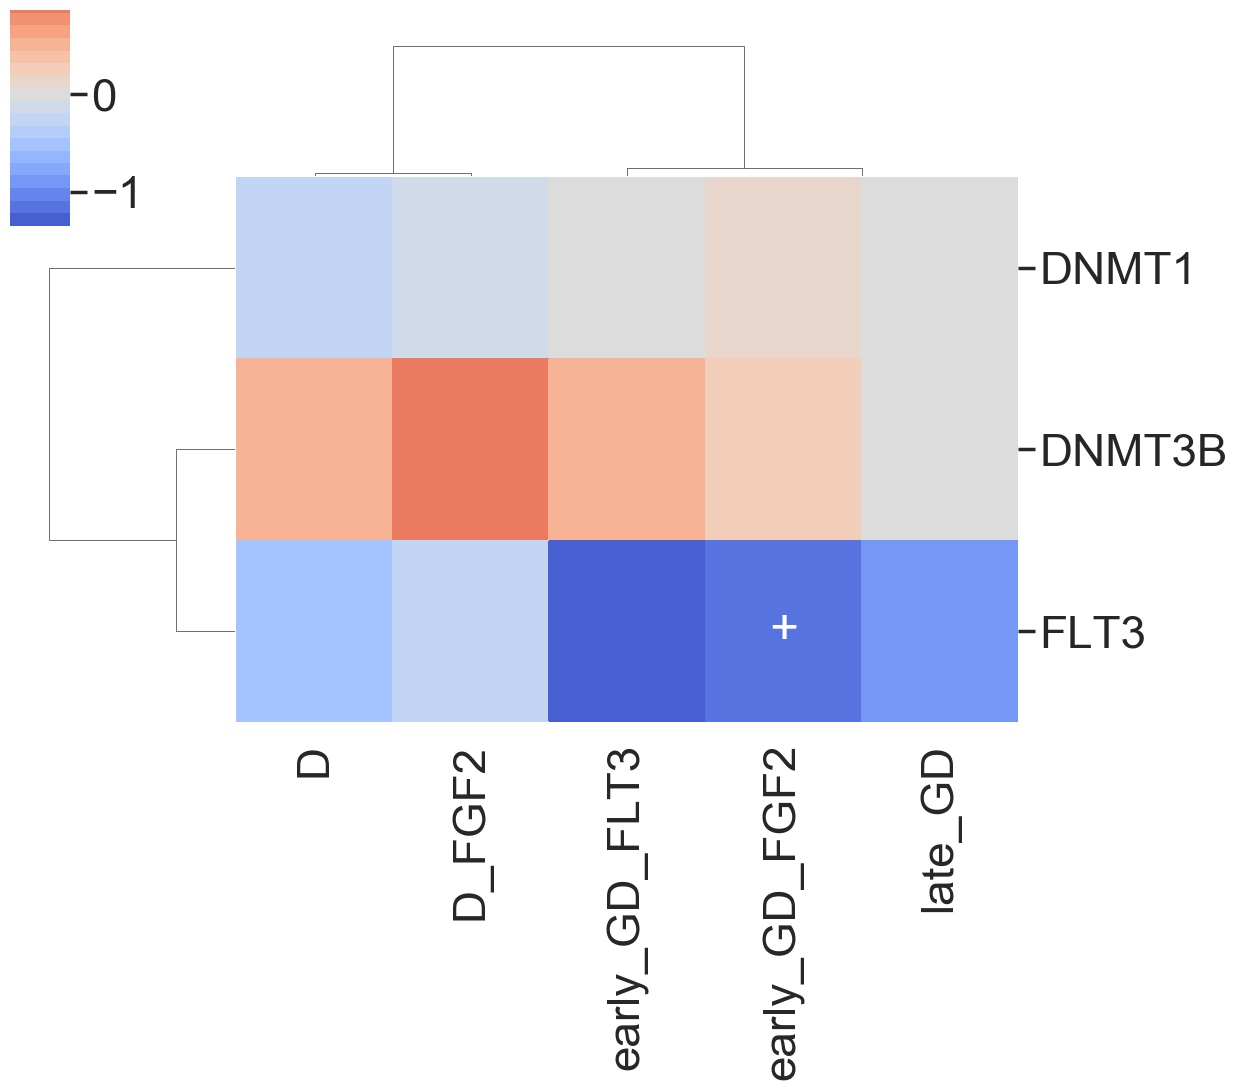

In [67]:
g = data.species.subset(species=['FLT3', 'DNMT1'], index='identifier').heatmap(
    figsize=(12,12),
    cluster_col=True, 
    cluster_row=True,
    y_tick_labels=True,
#     x_tick_labels=True
    
);
g.ax_heatmap.tick_params(axis='y', rotation=0)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

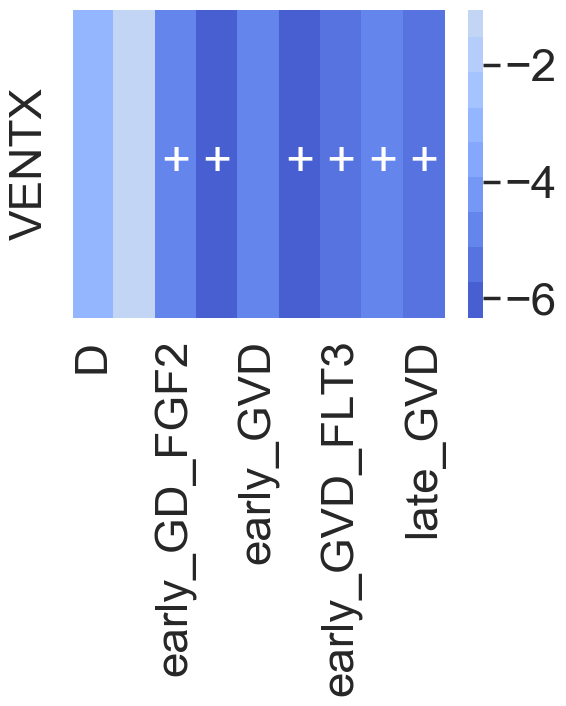

In [39]:
g = data.species.subset(species=['VENTX', 'BSX'], index='identifier').heatmap(
    figsize=(6,4),
    cluster_col=False, 
    cluster_row=False,
    y_tick_labels=True,
#     x_tick_labels=True
    
);
# g.ax_heatmap.tick_params(axis='y', rotation=0)

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.




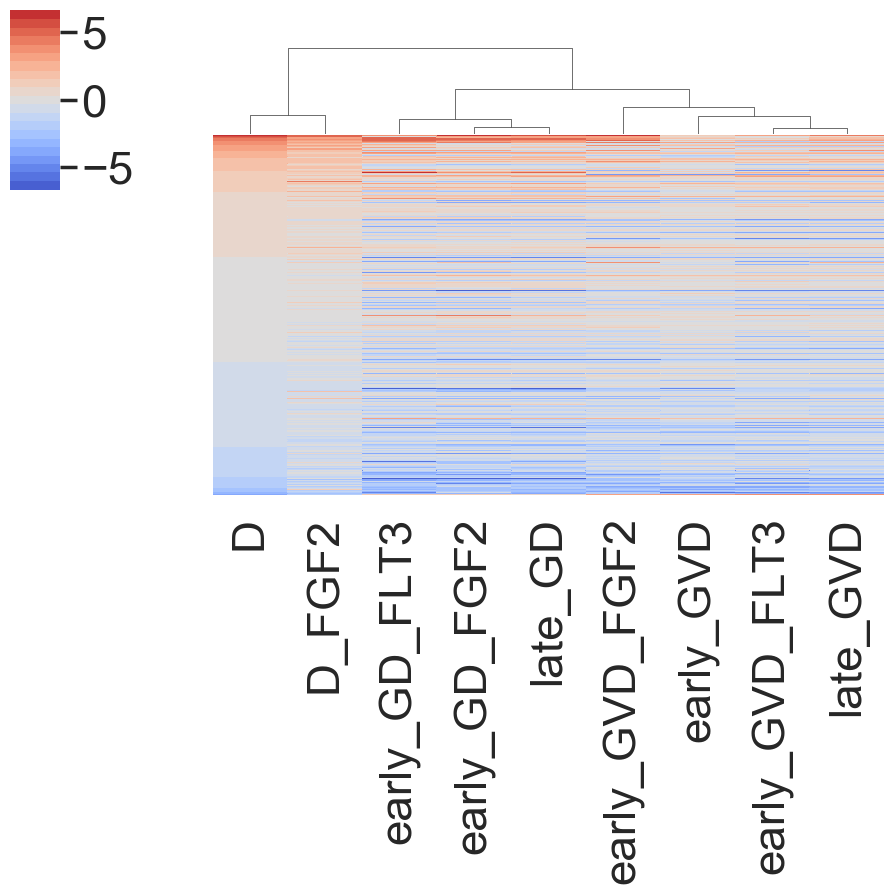

In [40]:
data.species.heatmap(
    min_sig=2,
#     linewidths=0.001,
    figsize=(10,10),
    y_tick_labels=False,
    annotate_sig=False,
    cluster_row=False,
    cluster_col=True,
);

plt.savefig('rnaseq_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('rnaseq_heatmap.pdf', dpi=300, bbox_inches='tight')

In [68]:
from magine.enrichment.enrichr import Enrichr

In [75]:
e =Enrichr()

In [84]:
data.D.sig.down.id_list
len(data.D.sig.down.id_list)

1325

In [85]:
dec = e.run_samples(
    [data.D.sig.up.id_list, data.D.sig.down.id_list], 
    sample_ids=['up', 'down'],
    gene_set_lib='Reactome_2016'
)
# dec['sample_id'] = 'DEC'

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

In [ ]:
dec.term_name = dec.term_name.str.split(' r-hsa').str.get(0)

In [ ]:
dec.require_n_sig(n_sig=1).remove_redundant(
    level='dataframe',
).heatmap(
    
figsize=(4, 16),
    cluster_row=False,
    linewidths=0.01,
);
plt.savefig('decitabine_only_enrichment.png', dpi=300, bbox_inches='tight')
plt.savefig('decitabine_only_enrichment.pdf', dpi=300, bbox_inches='tight')

In [ ]:
dec.sig.remove_redundant()

In [ ]:
gs = dec.term_to_genes('cd28 co-stimulation')
data.species.heatmap(gs);

In [ ]:

gs = dec.term_to_genes('rna polymerase i transcription initiation')
data.species.heatmap(gs, figsize=(12,12));

In [ ]:
gs = dec.term_to_genes('negative regulation of mapk pathway')
data.species.heatmap(gs, figsize=(6,6));

In [ ]:
gs = dec.term_to_genes('unwinding of dna')
data.species.heatmap(gs);